## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [6]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd

In [7]:
data = pd.read_csv('C:\\Users\\ABBAS\\Desktop\\Data an\\Open Test\\datasets\\office_episodes.csv')

In [33]:
data.describe()

,episode_number,season,ratings,votes,viewership_mil,duration,scaled_ratings
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,93.500000,5.468085,8.237234,2838.228723,7.246330,27.053191,0.511636
std,54.415071,2.386245,0.589930,1063.165290,2.066012,6.937254,0.184353
min,0.000000,1.000000,6.600000,1832.000000,3.250000,19.000000,0.000000
25%,46.750000,3.000000,7.800000,2187.750000,5.990000,22.000000,0.375000
50%,93.500000,6.000000,8.200000,2614.000000,7.535000,23.000000,0.500000
75%,140.250000,7.250000,8.600000,3144.250000,8.425000,30.000000,0.625000
max,187.000000,9.000000,9.800000,10515.000000,22.910000,60.000000,1.000000


In [5]:
data.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


In [34]:
data["ratings"].mean()

8.23723404255319

In [35]:
data["duration"].max()

60

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

In [36]:
data.values

array([[0, 1, 'Pilot', ...,
        'Ricky Gervais |Stephen Merchant and Greg Daniels', False,
        0.28125],
       [1, 1, 'Diversity Day', ..., 'B. J. Novak', False, 0.53125],
       [2, 1, 'Health Care', ..., 'Paul Lieberstein', False, 0.375],
       ...,
       [185, 9, "Livin' the Dream", ..., 'Niki Schwartz-Wright', True,
        0.75],
       [186, 9, 'A.A.R.M.', ..., 'Brent Forrester', False, 0.90625],
       [187, 9, 'Finale', ..., 'Greg Daniels', True, 1.0]], dtype=object)

In [17]:
print(data)

     episode_number  season     episode_title  \
0                 0       1             Pilot   
1                 1       1     Diversity Day   
2                 2       1       Health Care   
3                 3       1      The Alliance   
4                 4       1        Basketball   
..              ...     ...               ...   
183             183       9     Stairmageddon   
184             184       9    Paper Airplane   
185             185       9  Livin' the Dream   
186             186       9          A.A.R.M.   
187             187       9            Finale   

                                           description  ratings  votes  \
0    The premiere episode introduces the boss and s...      7.5   4936   
1    Michael's off color remark puts a sensitivity ...      8.3   4801   
2    Michael leaves Dwight in charge of picking the...      7.8   4024   
3    Just for a laugh, Jim agrees to an alliance wi...      8.1   3915   
4    Michael and his staff challenge the 

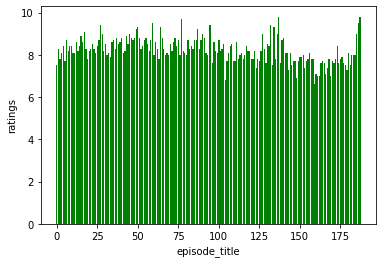

In [41]:
plt.bar(data['episode_number'], data['ratings'], color='g')
plt.ylabel('ratings')
plt.xlabel('episode_title')
plt.show()

In [10]:
data.head(1)

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125


In [15]:
data

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.20,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.00,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.80,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.40,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.00,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,183,9,Stairmageddon,Dwight shoots Stanley with a bull tranquilizer...,8.0,1985,3.83,22,2013-04-11,NaN,Matt Sohn,Dan Sterling,False,0.43750
184,184,9,Paper Airplane,The employees hold a paper airplane competitio...,8.0,2007,3.25,22,2013-04-25,NaN,Jesse Peretz,Halsted Sullivan | Warren Lieberstein,False,0.43750
185,185,9,Livin' the Dream,Dwight becomes regional manager after Andy qui...,9.0,2831,3.51,42,2013-05-02,Michael Imperioli,Jeffrey Blitz,Niki Schwartz-Wright,True,0.75000
186,186,9,A.A.R.M.,Dwight prepares for a marriage proposal and hi...,9.5,3914,4.56,43,2013-05-09,NaN,David Rogers,Brent Forrester,False,0.90625


In [31]:
data = pd.read_csv('C:\\Users\\ABBAS\\Desktop\\Data an\\Open Test\\datasets\\the_office_series.csv')

In [32]:
data.head
df = pd.DataFrame(data)
df.tail

<bound method NDFrame.tail of      Unnamed: 0  Season      EpisodeTitle  \
0             0       1             Pilot   
1             1       1     Diversity Day   
2             2       1       Health Care   
3             3       1      The Alliance   
4             4       1        Basketball   
..          ...     ...               ...   
183         183       9     Stairmageddon   
184         184       9    Paper Airplane   
185         185       9  Livin' the Dream   
186         186       9          A.A.R.M.   
187         187       9            Finale   

                                                 About  Ratings  Votes  \
0    The premiere episode introduces the boss and s...      7.5   4936   
1    Michael's off color remark puts a sensitivity ...      8.3   4801   
2    Michael leaves Dwight in charge of picking the...      7.8   4024   
3    Just for a laugh, Jim agrees to an alliance wi...      8.1   3915   
4    Michael and his staff challenge the warehouse ...     

In [41]:
import plotly.graph_objects as go
import plotly.express as px
g3 = df.groupby('Season')['GuestStars'].count().reset_index()
g3_df = pd.DataFrame(g3)
#fig = px.pie(names=g3_df['Season'], values=g3_df['GuestStars'])

fig = go.Figure(data=[go.Pie(labels=g3['Season'], values=g3['GuestStars'],sort=False, marker=dict(colors=px.colors.qualitative.Prism))])


fig.update_layout(title_text='Number of guest stars appeared each season',template='plotly_dark')
fig.show()

In [42]:
top_10_long = (df.sort_values(by=['Duration','Ratings'],ascending=False)).iloc[:10,:]
fig = px.bar(top_10_long,x='EpisodeTitle',y='Duration',color_discrete_sequence=['gold'])
fig.update_layout(title_text='Top 10 longest episodes of all time',template='plotly_dark')
fig.show()